In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [110]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2.0,2.0,2,4.0,NaN,New Property,NaN,NaN,1103.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2.0,2.0,1,17.0,NaN,New Property,NaN,1000.0,585.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3.0,4.0,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000


In [111]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


Built Up Area

In [114]:
# Set the default font to a commonly available one
plt.rcParams['font.family'] = 'serif'

<AxesSubplot: xlabel='built_up_area', ylabel='super_built_up_area'>

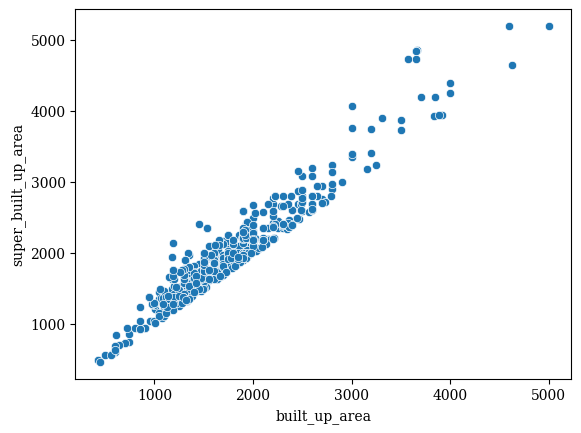

In [115]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<AxesSubplot: xlabel='built_up_area', ylabel='carpet_area'>

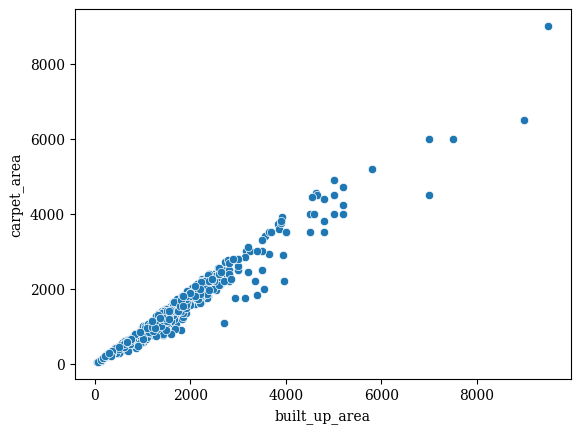

In [116]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [117]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

,0
0,False
1,False
2,False
3,False
4,False
...,...
3550,False
3551,False
3552,False
3553,False


In [118]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [119]:
all_present_df.shape

(531, 24)

In [120]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [121]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [122]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [123]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [124]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3.0,2.0,2,2.0,NaN,New Property,1081.0,NaN,650.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2.0,2.0,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,266.000000
38,flat,corona optus,sector 37,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3.0,3.0,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,580.666667
40,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3.0,3.0,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0.0,1.0,0.0,0.0,0.0,2.0,26.0,682.333333
45,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3.0,2.0,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,509.000000


In [125]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-125-a2fefc960aa3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
df.update(sbc_df)

In [127]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [128]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [129]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4.0,4.0,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0,1337.500000
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3.0,3.0,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,95.0,779.333333
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3.0,4.0,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,165.0,695.666667
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3.0,4.0,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,101.0,861.666667
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3.0,4.0,3,16.0,South,Relatively New,1995.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,60.0,682.666667


In [130]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-130-554030e2e595>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
df.update(sb_df)
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [134]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
df.update(c_df)
df.isnull().sum()


<ipython-input-134-8454575465d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
area,0
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


<AxesSubplot: xlabel='built_up_area', ylabel='price'>

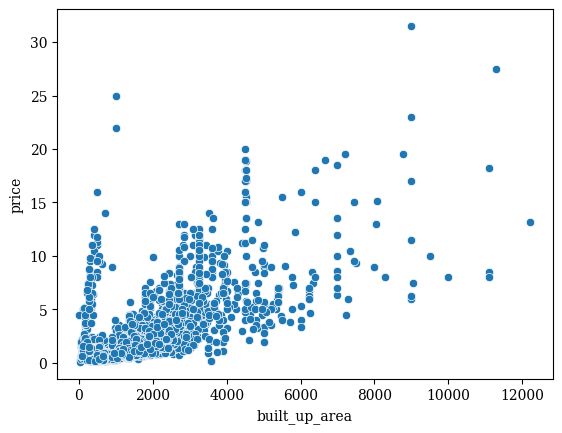

In [135]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [136]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [137]:
anamoly_df.sample(5)

,price,area,built_up_area
951,6.25,1800.0,1800.0
68,7.60,1961.0,1935.0
3147,3.75,1440.0,160.0
40,2.80,2047.0,1971.0
429,2.68,1557.0,1557.0


In [138]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [139]:
df.update(anamoly_df)

<AxesSubplot: xlabel='built_up_area', ylabel='price'>

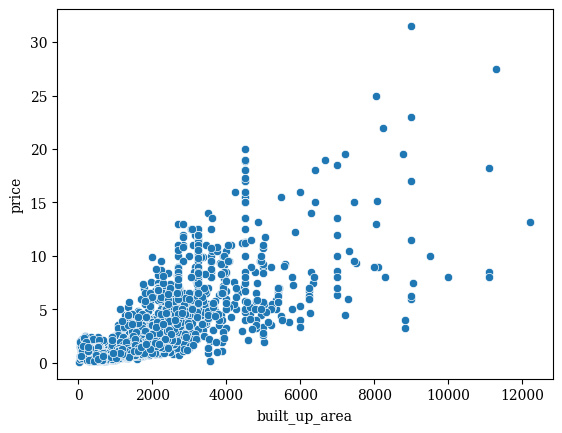

In [140]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [141]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [142]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,NaN,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,NaN,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,NaN,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,North-West,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,North-East,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [143]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,17
facing,1011


Floor Number


In [144]:
df[df['floorNum'].isnull()]
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [145]:
df['floorNum'].fillna(2.0,inplace=True)

In [146]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
facing,1011


In [147]:
1011/df.shape[0]

0.2843881856540084

Facing

<AxesSubplot: ylabel='facing'>

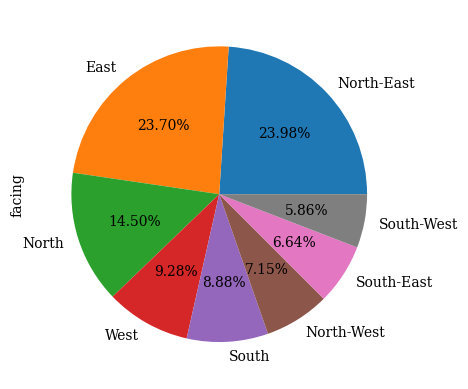

In [148]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [149]:
df.drop(columns=['facing'],inplace=True)
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2985,flat,gls avenue 51,sector 92,0.42,7107.0,2.0,2.0,1,4.0,Relatively New,657.0,1.0,0.0,0.0,1.0,0.0,1.0,42.0
1104,house,independent,sector 4,0.47,10609.0,2.0,2.0,1,2.0,New Property,50.0,1.0,0.0,0.0,0.0,0.0,1.0,73.0
10,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,flat,sapphire eighty three,sector 83,0.40,8547.0,1.0,1.0,1,6.0,Relatively New,520.0,0.0,0.0,0.0,0.0,0.0,2.0,52.0
853,flat,hcbs sports ville,sohna road,0.22,3143.0,1.0,1.0,1,1.0,New Property,778.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0


In [150]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [151]:
df.drop(index=[2536],inplace=True)
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


Age Possession

In [152]:
df['agePossession'].value_counts()

,agePossession
Relatively New,1605
New Property,557
Moderately Old,545
Old Property,293
Undefined,291
Under Construction,263


In [153]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3.0,2.0,0,1.0,Undefined,2360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,house,greenopolis,sector 89,0.70,5397.0,2.0,2.0,2,14.0,Undefined,1297.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,flat,smart world gems,sector 89,1.71,12000.0,3.0,2.0,0,3.0,Undefined,1423.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
70,flat,rof aalayas,sector 102,0.45,6000.0,1.0,1.0,2,6.0,Undefined,750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7.0,2.0,0,1.0,Undefined,1980.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,flat,raheja vedaanta,sector 108,0.70,4522.0,2.0,2.0,3,1.0,Undefined,1548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3502,flat,signature global city,sector 37d,1.10,9839.0,2.0,2.0,2,4.0,Undefined,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
3508,house,independent,sector 21,0.45,8411.0,3.0,2.0,1,1.0,Undefined,594.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3520,flat,sidhartha ncr one,sector 95,0.57,4179.0,2.0,2.0,2,10.0,Undefined,1364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [155]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [156]:
df['agePossession'].value_counts()

,agePossession
Relatively New,1715
New Property,598
Moderately Old,585
Old Property,324
Under Construction,277
Undefined,55


In [158]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [159]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [160]:
df['agePossession'].value_counts()

,agePossession
Relatively New,1730
New Property,599
Moderately Old,592
Old Property,327
Under Construction,277
Undefined,29


In [161]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [162]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [163]:
df['agePossession'].value_counts()

,agePossession
Relatively New,1732
Moderately Old,619
New Property,599
Old Property,327
Under Construction,277


In [164]:
df.isnull().sum()

,0
property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [165]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [166]:
df.shape

(3554, 18)